In [71]:
import pandas as pd
import seaborn as sns

food_raw = pd.read_csv(r'E:\AnalystBuilderTestFolder\u_food_marketing.csv')


In [9]:
food_raw.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [19]:
food_raw.drop_duplicates(keep = False, inplace = True)

In [21]:
food = food_raw
food['Children'] = food[['Kidhome', 'Teenhome']].sum(axis=1)

In [279]:
food['e'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:2, 0:0})

food['Marital_Status'] = food[['marital_Divorced','marital_Married', 'marital_Single', 'marital_Widow', 'marital_Together']].sum(axis=1)
food['Marital_Status'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Widow', 1: 'Together'})

In [267]:
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})

food['Education_Status'] = food[['education_PhD','education_Master', 'education_Graduation', 'education_Basic', 'education_2n Cycle']].sum(axis=1)
food['Education_Status'] = food['Education_Status'].map({5: 'PHD', 4: 'Masters', 3: 'Graduated', 2: 'Basic', 1: 'Cycle 2'})

In [90]:
food['Accepted_Campaigns'] = food[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [92]:
master_correlations = food.corr(method = 'pearson', numeric_only = True)
sub_correlations = master_correlations[(master_correlations > .3) & (master_correlations < 1)]

<Axes: >

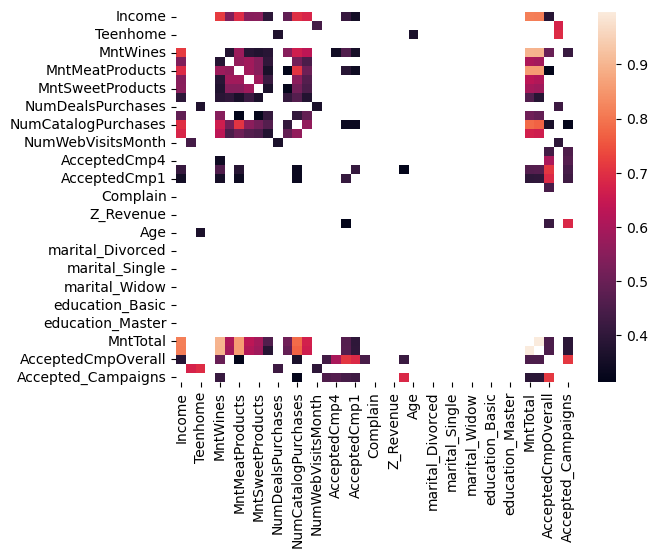

In [100]:
sns.heatmap(sub_correlations)

In [120]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]}-{age_range[1]}"
    return("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

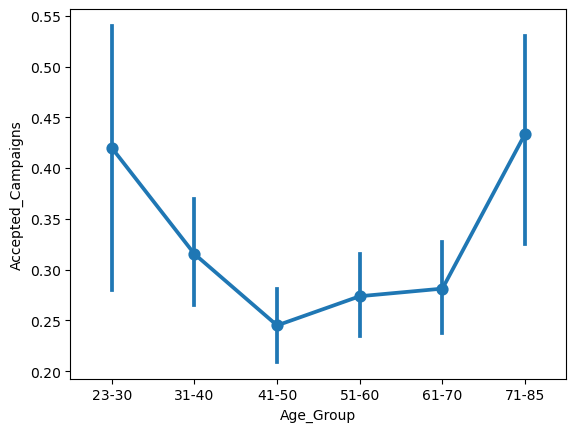

In [122]:
ordered_age = ['23-30', '31-40', '41-50', '51-60', '61-70', '71-85']
sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = ordered_age)

In [153]:
demography_count = food['Age_Group'].value_counts()

(1843, 44)

In [171]:
percentage = demography_count / food.shape[0]
percentage = percentage.reset_index()
percentage.columns = ['Age Group', 'Percentage']
percentage = percentage.sort_values('Age Group')

,Age Group,Percentage
5,23-30,0.027130
3,31-40,0.161693
0,41-50,0.332067
1,51-60,0.221921
2,61-70,0.212154
4,71-85,0.045035


Text(0.5, 1.0, 'Percentage of Accepted Campaigns by Age Group')

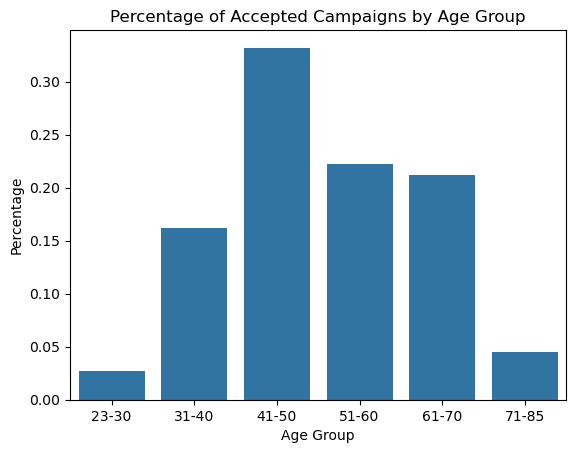

In [173]:
sns.barplot(x = 'Age Group', y = 'Percentage', data = percentage).set_title("Percentage of Accepted Campaigns by Age Group")

Text(0.5, 1.0, 'Spending by Age Group')

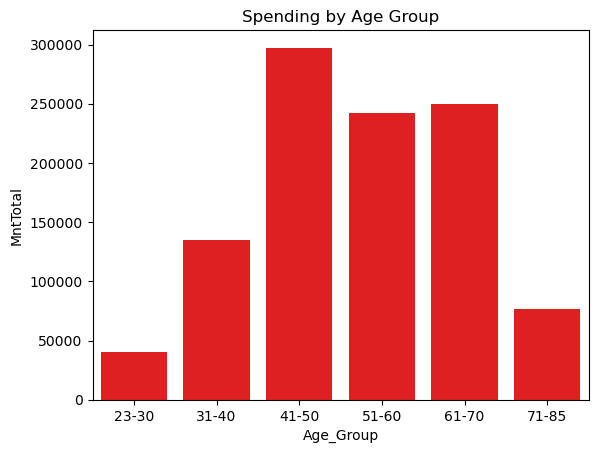

In [181]:
demo_accepted = food[food['Accepted_Campaigns'] != 0 ]
demo_spending = food.groupby("Age_Group")['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', color = 'red', data = demo_spending).set_title("Spending by Age Group")

Text(0.5, 1.0, 'Spending by Age Group')

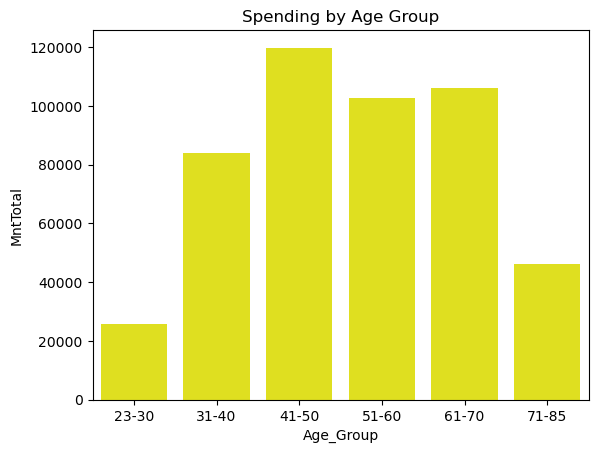

In [185]:

demo_spending = demo_accepted.groupby("Age_Group")['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', color = 'yellow', data = demo_spending).set_title("Spending by Age Group")

Text(0.5, 1.0, 'Purchases by Sales Channel')

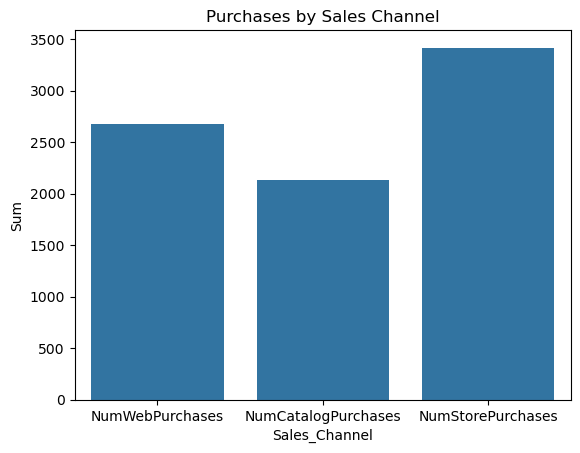

In [215]:
sum_channel = pd.DataFrame(demo_accepted[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()).reset_index()
sum_channel.rename(columns = {'index': 'Sales_Channel', 0 : 'Sum'}, inplace = True)
sns.barplot(x = 'Sales_Channel', y = 'Sum', data = sum_channel).set_title("Purchases by Sales Channel")

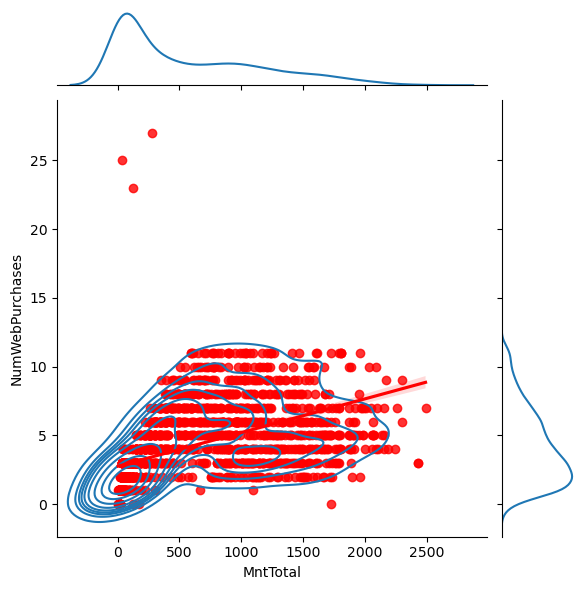

In [235]:
sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde").plot_joint(sns.regplot, color = 'r')

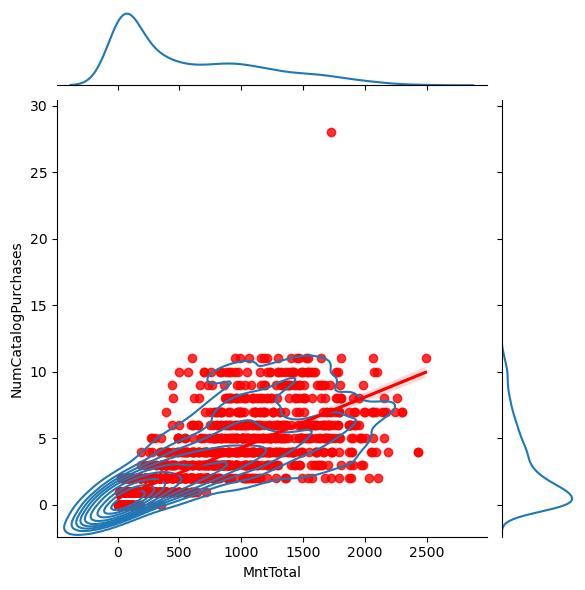

In [237]:
sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = "kde").plot_joint(sns.regplot, color = 'r')

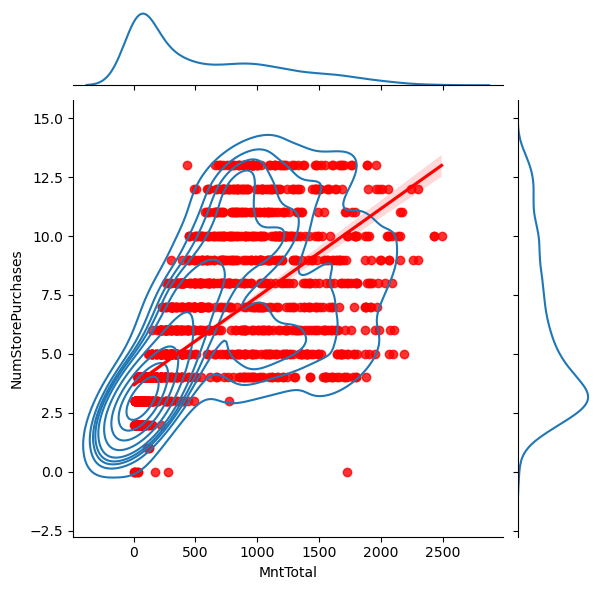

In [251]:
sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = "kde").plot_joint(sns.regplot, color = 'r')

<Axes: xlabel='Children', ylabel='MntTotal'>

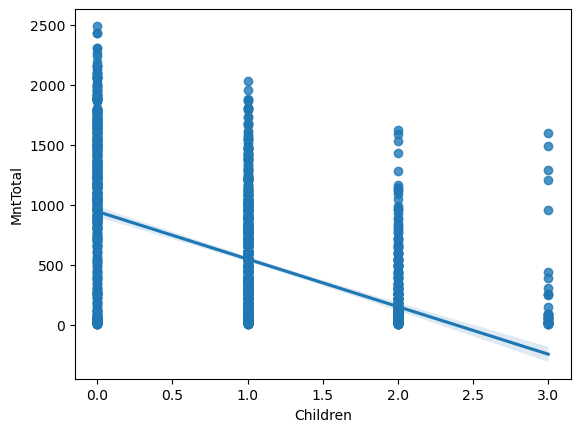

In [259]:
sns.regplot(x = 'Children', y = 'MntTotal', data = food)

<Axes: xlabel='Children', ylabel='Accepted_Campaigns'>

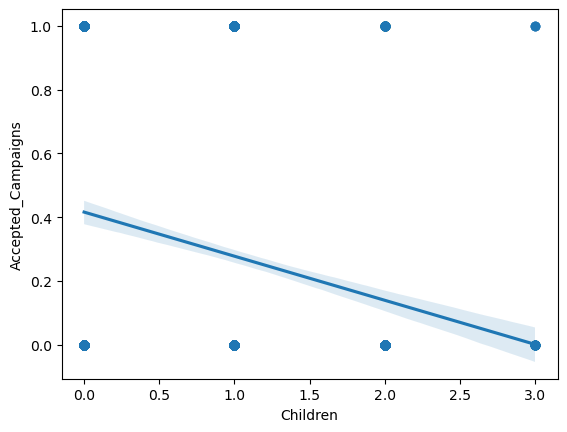

In [257]:
sns.regplot(x = 'Children', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

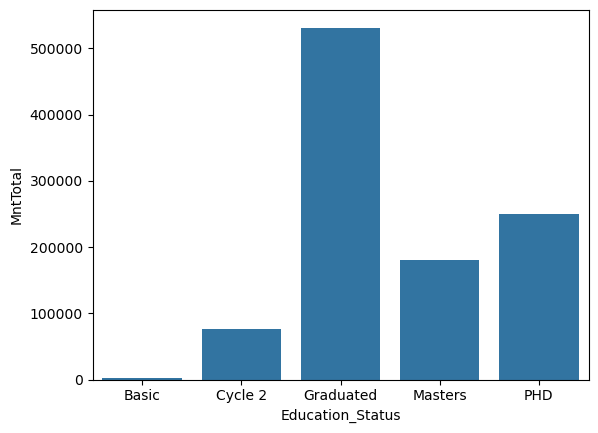

In [273]:
edu_bucket = food.groupby('Education_Status')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Education_Status', y = 'MntTotal', data = edu_bucket)

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

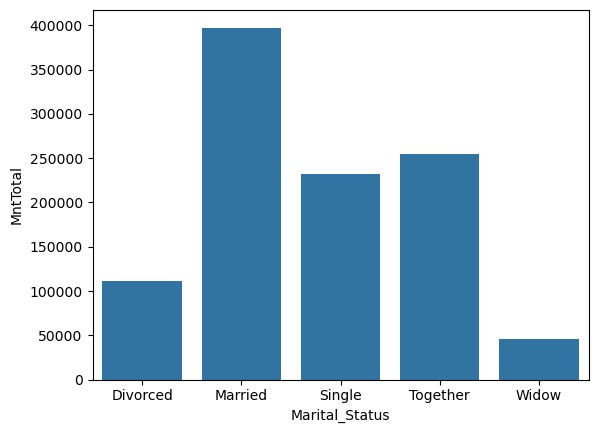

In [277]:
married_bucket = food.groupby('Marital_Status')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Marital_Status', y = 'MntTotal', data = married_bucket)

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

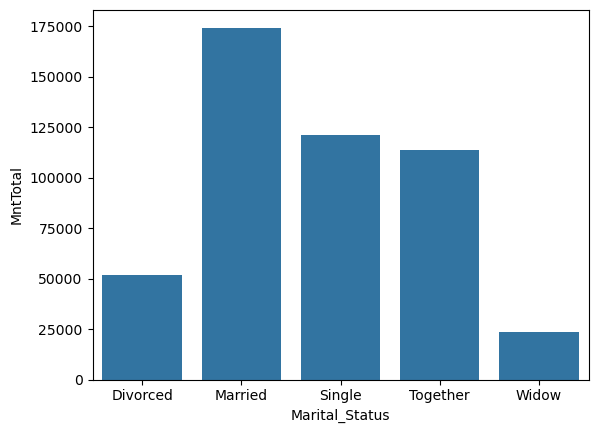

In [281]:
married_bucket = demo_accepted.groupby('Marital_Status')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Marital_Status', y = 'MntTotal', data = married_bucket)